In [8]:
import yaml
import pandas as pd
from backend.utils.data_preprocessor import DataPreprocessor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

with open('../config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)

interval: str = "1h"
training_file_path: str = f"../data/merged.csv"
testing_file_path: str = f"../data/indicators ({interval})/PG_indicators.csv"

training_df: pd.DataFrame = pd.read_csv(training_file_path)
testing_df: pd.DataFrame = pd.read_csv(testing_file_path)
training_preprocessor = DataPreprocessor(training_df)
testing_preprocessor = DataPreprocessor(testing_df)

scaler = MinMaxScaler()
X_train: [[[float]]] = training_preprocessor.target_data_batched
X_test: [[[float]]] = testing_preprocessor.target_data_batched
y_test: [float] = testing_preprocessor.target_data_batched_labels

X_train_reshaped = X_train.reshape(-1, X_train.shape[-1])
X_test_reshaped = X_test.reshape(-1, X_test.shape[-1])
X_train_fitted_reshaped = scaler.fit(X_train_reshaped)

X_test_scaled_reshaped = scaler.transform(X_test_reshaped)
X_test_scaled = X_test_scaled_reshaped.reshape(X_test.shape)


In [9]:
print("Testing Dataset shape:", testing_df.shape)
print("Testing Dataset as time series batches:",X_test.shape, y_test.shape)
# %run ../tests/data_preprocessor_validator.py
testing_preprocessor.target_data

Testing Dataset shape: (5000, 13)
Testing Dataset as time series batches: (4968, 30, 29) (4968,)


open    high     low   close   volume  percent_b  macd  \
datetime                                                                        
2021-03-08 12:30:00  128.28  128.56  128.14  128.53   803142       0.97  0.95   
2021-03-08 13:30:00  128.54  128.90  128.35  128.46   881920       0.90  1.06   
2021-03-08 14:30:00  128.48  128.52  127.98  128.15   878928       0.83  1.10   
2021-03-08 15:30:00  128.16  128.19  127.23  127.27  1242456       0.71  1.05   
2021-03-09 09:30:00  128.04  128.91  127.02  127.96  2122317       0.76  1.06   
2021-03-09 10:30:00  127.96  128.05  126.96  127.07  1146944       0.64  0.98   
2021-03-09 11:30:00  127.11  127.42  126.78  127.42   728732       0.66  0.94   
2021-03-09 12:30:00  127.41  127.61  127.18  127.18   676586       0.61  0.87   
2021-03-09 13:30:00  127.17  127.35  126.95  127.08   837879       0.58  0.80   
2021-03-09 14:30:00  127.08  127.22  126.51  126.54   687520       0.44  0.70   
2021-03-09 15:30:00  126.54  126.71  126.12  126.13  1009451       0.30  0.57   
2021-03-10 09:30:00  126.18  127.78  125.47  127.76  1863614       0.69  0.60   
2021-03-10 10:30:00  127.75  128.05  127.24  127.89  1371165       0.70  0.62   
2021-03-10 11:30:00  127.88  128.05  127.37  127.85   730531       0.68  0.63   
2021-03-10 12:30:00  127.87  128.23  127.67  127.86   680221       0.66  0.63   
2021-03-10 13:30:00  127.87  128.42  127.85  128.15   899936       0.74  0.65   
2021-03-10 14:30:00  128.15  128.20  127.74  127.84   809848       0.61  0.63   
2021-03-10 15:30:00  127.84  127.90  127.21  127.30  1229844       0.38  0.56   
2021-03-11 09:30:00  127.34  127.85  126.72  127.68  1501654       0.52  0.54   
2021-03-11 10:30:00  127.69  127.85  127.03  127.55   892832       0.49  0.50   
2021-03-11 11:30:00  127.54  127.68  127.08  127.24   907872       0.37  0.44   
2021-03-11 12:30:00  127.24  127.59  127.15  127.46   526331       0.50  0.40   
2021-03-11 13:30:00  127.46  127.80  127.36  127.50   663922       0.53  0.38   
2021-03-11 14:30:00  127.50  127.62  127.08  127.14   678781       0.35  0.32   
2021-03-11 15:30:00  127.14  127.36  126.90  126.90   837745       0.25  0.25   
2021-03-12 09:30:00  127.65  128.71  127.65  128.47  1184760       0.98  0.32   
2021-03-12 10:30:00  128.47  128.81  127.95  128.12   741358       0.79  0.35   
2021-03-12 11:30:00  128.11  128.11  127.84  127.88   431669       0.66  0.34   
2021-03-12 12:30:00  127.89  128.11  127.80  128.10   368284       0.74  0.35   
2021-03-12 13:30:00  128.08  128.40  128.03  128.25   532214       0.79  0.37   
2021-03-12 14:30:00  128.27  128.30  127.92  128.18   738389       0.76  0.37   
2021-03-12 15:30:00  128.19  128.34  128.06  128.10   886264       0.70  0.36   
2021-03-15 09:30:00  128.14  129.04  127.22  127.47  1209436       0.33  0.30   
2021-03-15 10:30:00  127.45  128.14  127.21  128.13   881542       0.72  0.30   
2021-03-15 11:30:00  128.13  128.56  128.06  128.51   729227       0.90  0.33   
2021-03-15 12:30:00  128.50  128.50  128.05  128.15   504042       0.70  0.32   
2021-03-15 13:30:00  128.17  128.69  128.09  128.37   654229       0.79  0.33   
2021-03-15 14:30:00  128.38  128.43  127.96  127.97   572171       0.56  0.30   
2021-03-15 15:30:00  127.97  128.75  127.87  128.54   733187       0.84  0.31   
2021-03-16 09:30:00  128.93  129.79  128.65  129.74  1044588       1.21  0.42   
2021-03-16 10:30:00  129.74  129.98  129.37  129.45   971172       1.00  0.47   
2021-03-16 11:30:00  129.45  129.66  128.92  129.66   625206       1.00  0.53   
2021-03-16 12:30:00  129.66  129.72  129.26  129.47   489593       0.88  0.55   
2021-03-16 13:30:00  129.47  129.67  129.14  129.67   493016       0.90  0.58   
2021-03-16 14:30:00  129.66  129.67  128.96  129.01   796918       0.67  0.54   
2021-03-16 15:30:00  129.01  129.40  128.89  129.00   995994       0.65  0.50   
2021-03-17 09:30:00  129.18  129.25  128.39  128.99   917066       0.63  0.47   
2021-03-17 10:30:00  128.96  129.34  128.87  128.94   

In [10]:
from sklearn.metrics import classification_report
from keras.models import load_model
from backend.utils.model_evaluator import ModelEvaluator

model_path: str = "../models/saved models/trained_StockTrendLSTM_model.keras"
model = load_model(model_path)

test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

classification_report_output = classification_report(y_test, y_pred)
print('Classification Report:\n', classification_report_output)

model_evaluator = ModelEvaluator(test_loss, y_test, y_pred)
metrics_df = model_evaluator.evaluation_metrics
metrics_df

156/156 [==============================] - 1s 4ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.70      0.70      2440
           1       0.71      0.70      0.71      2528

    accuracy                           0.70      4968
   macro avg       0.70      0.70      0.70      4968
weighted avg       0.70      0.70      0.70      4968



Metric     Score
0       Loss  0.586265
1   Accuracy  0.700886
2  Precision  0.707075
3     Recall  0.703718
4    F1Score  0.705393
5    ROC AUC  0.700835

In [11]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten(), 'Predicted_Prob': y_pred_prob.flatten()})
results_df

Actual  Predicted  Predicted_Prob
0          0          1        0.525482
1          0          0        0.326150
2          0          0        0.172486
3          1          1        0.897563
4          1          1        0.764230
5          0          0        0.372295
6          0          1        0.558716
7          1          0        0.260850
8          1          1        0.857783
9          1          1        0.789969
10         0          0        0.336031
11         1          1        0.509202
12         0          1        0.561159
13         0          1        0.634198
14         0          0        0.263624
15         0          0        0.483966
16         0          0        0.402711
17         1          0        0.399573
18         1          1        0.828129
19         0          0        0.412617
20         0          0        0.276535
21         0          0        0.337238
22         0          0        0.286911
23         0          0        0.103440
24         1          0        0.452870
25         1          1        0.584254
26         1          1        0.676282
27         1          1        0.535382
28         1          1        0.673922
29         1          1        0.562307
30         1          1        0.706327
31         0          0        0.345128
32         0          0        0.369902
33         0          0        0.376480
34         1          1        0.502844
35         0          1        0.711188
36         1          0        0.114697
37         1          1        0.961521
38         1          1        0.614048
39         0          1        0.567107
40         0          0        0.339961
41         0          0        0.405495
42         1          1        0.541903
43         1          1        0.716132
44         1          1        0.727485
45         1          1        0.613432
46         1          1        0.674373
47         1          1        0.605878
48         0          1        0.653601
49         0          0        0.165623
50         0          1        0.661588
51         1          0        0.287614
52         1          1        0.527435
53         1          1        0.608928
54         1          1        0.543752
55         1          1        0.582041
56         1          0        0.337672
57         0          0        0.278680
58         0          0        0.305068
59         1          1        0.755282
60         0          1        0.544427
61         1          0        0.413008
62         1          1        0.729131
63         1          1        0.735115
64         0          1        0.664419
65         0          0        0.157678
66         1          1        0.619808
67         1          1        0.813917
68         1          1        0.682582
69         1          1        0.831983
70         1          0        0.329024
71         1          1        0.861077
72         1          1        0.602333
73         1          1        0.660370
74         0          1        0.566642
75         1          0        0.366626
76         1          1        0.736342
77         0          1        0.633795
78         0          1        0.550375
79         0          0        0.320742
80         0          0        0.205580
81         1          1        0.525456
82         1          1        0.595369
83         0          1        0.527262
84         0          0        0.316357
85         1          0        0.390963
86         1          1        0.750652
87         0          1        0.546561
88         0          0        0.201147
89         0          0        0.403825
90         0          0        0.458075
91         0          0        0.285304
92         0          0        0.438149
93         0          0        0.095030
94         1          1        0.605811
95         1          1        0.658178
96         1          1        0.710197
97         0          0        0.345825
98         0          0        0.448846
99    

In [12]:
last_entry = X_test_scaled[-1]
ground_truth_label = y_test[-1]

reshaped_last_entry = last_entry.reshape((1, X_test.shape[-2], X_test.shape[-1]))
y_pred_prob_single = model.predict(reshaped_last_entry)
y_pred_single = (y_pred_prob_single > 0.5).astype(int)


print("Ground Truth Label:", ground_truth_label)
print("Predicted Probability:", y_pred_prob_single[0, 0])
print("Predicted Class:", y_pred_single[0, 0])

1/1 [==============================] - 0s 25ms/step
Ground Truth Label: 0
Predicted Probability: 0.67347187
Predicted Class: 1


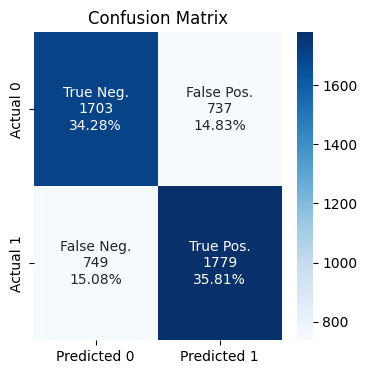

In [13]:
from backend.utils.visualizing_service import plot_confusion_matrix
plot_confusion_matrix(y_test, y_pred)

In [14]:
from backend.utils.visualizing_service import plot_correlation_heatmap
# plot_correlation_heatmap(testing_preprocessor.target_data)
